<a href="https://colab.research.google.com/github/hewan00/lab_eda/blob/main/Copy_of_lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


1. Download a small (5-15) set of variables of interest. (You can also check out get_gss.ipynb for some processed data.)

In [ ]:
cd /var

/var


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

allthingsmarriage = pd.read_excel('/content/GSS.xlsx')

2. Write a short description of the data you chose, and why. (~500 words)

We chose variables related to marriage, such as happiness with marriage, opinions on interracial marriage, sex before marriage, sex outside of marriage, and amount of children. This data was collected from 1972 to 2022. Some of these variables are numerical, such as children. However, others, like premarital sex are an atttiude and belief assessment so thet are on a scale from not wrong at all to always wrong and happiness of marriage is also on a scale from very happy to not. Some are binary yes and no, like if interacial marriage is seen as okay. Below we have included a description of each variable from GSS.

Variables:

- year = GSS year for this respondent
- marital = marital status
- childs = number of children
- racmar = favor law against racial intermarriage
- hapmar = happiness of marriage
- premarsx = sex before marriage
- xmarsex = sex with person other than spouse

We chose this data because we are interested in the confounding variables attached to how marriage, attitudes around it, and types of marriages have evolved. We cleaned all of the data to drop NaNs and missing data. Additionally, we coded all attitude and belief variables that were being read to numerical values to allow us to have more flexibility in the graphs we could create to visualize the relationships. Additionally, with them all coded as numbers we can make better statements about the summary data of each variable since the variables are coded on a scale. The scale for most of these variables is 1 being always wrong to 4 being never wrong. Binary variables with a yes or no response were recoded for 0 to be "No" and 1 to be "Yes". To explore marriage we will be creating table summaries and graphs to communicate a relationship or lack thereof between these variables in relation to marriage happiness, infedelity, or marriage status.

3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.

In [6]:
cd /var

/var


In [7]:
allthingsmarriage.head()

,year,id_,marital,childs,racmar,hapmar,premarsx,xmarsex
0,1972,1,Never married,0,NO,.i: Inapplicable,NOT WRONG AT ALL,.i: Inapplicable
1,1972,2,Married,5,YES,.i: Inapplicable,ALWAYS WRONG,.i: Inapplicable
2,1972,3,Married,4,YES,.i: Inapplicable,ALWAYS WRONG,.i: Inapplicable
3,1972,4,Married,0,YES,.i: Inapplicable,ALWAYS WRONG,.i: Inapplicable
4,1972,5,Married,2,NO,.i: Inapplicable,SOMETIMES WRONG,.i: Inapplicable


4. Produce some numeric summaries and visualizations.

In [8]:
allthingsmarriage.describe()

,year,id_
count,75699.000000,75699.000000
mean,1998.864503,1259.858598
std,15.722971,918.088290
min,1972.000000,1.000000
25%,1986.000000,543.000000
50%,1998.000000,1100.000000
75%,2012.000000,1766.000000
max,2024.000000,4510.000000


In [9]:
allthingsmarriage.info()
#evident that this data needs to be cleaned. We need to make these objects into numerical values that correspond appropriately to each variable
#for instance, the yeses will go to 1 and nos 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75699 entries, 0 to 75698
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      75699 non-null  int64 
 1   id_       75699 non-null  int64 
 2   marital   75699 non-null  object
 3   childs    75699 non-null  object
 4   racmar    75699 non-null  object
 5   hapmar    75699 non-null  object
 6   premarsx  75699 non-null  object
 7   xmarsex   75699 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.6+ MB


In [10]:
#coding hapmar variable
allthingsmarriage['hapmar'] = allthingsmarriage['hapmar'].replace('VERY HAPPY', 1)
allthingsmarriage['hapmar'] = allthingsmarriage['hapmar'].replace('PRETTY HAPPY', 2)
allthingsmarriage['hapmar'] = allthingsmarriage['hapmar'].replace('NOT TOO HAPPY', 3)
allthingsmarriage['hapmar'] = allthingsmarriage['hapmar'].replace('.d: Do not Know/Cannot Choose', 4)

In [11]:
#testing to see if replacements worked
print(allthingsmarriage['hapmar'].value_counts(dropna=False))

hapmar
.i:  Inapplicable                 40079
1                                 22229
2                                 12010
3                                  1111
.n:  No answer                      197
.d:  Do not Know/Cannot Choose       53
.s:  Skipped on Web                  20
Name: count, dtype: int64


In [12]:
#coercing hapmar variable so all things not coded for goes to NA
allthingsmarriage['hapmar'] = pd.to_numeric(allthingsmarriage['hapmar'], errors='coerce')

In [13]:
#replacing to see if coercion worked
print(allthingsmarriage['hapmar'].value_counts(dropna=False))

hapmar
NaN    40349
1.0    22229
2.0    12010
3.0     1111
Name: count, dtype: int64


In [14]:
allthingsmarriage.head()

,year,id_,marital,childs,racmar,hapmar,premarsx,xmarsex
0,1972,1,Never married,0,NO,NaN,NOT WRONG AT ALL,.i: Inapplicable
1,1972,2,Married,5,YES,NaN,ALWAYS WRONG,.i: Inapplicable
2,1972,3,Married,4,YES,NaN,ALWAYS WRONG,.i: Inapplicable
3,1972,4,Married,0,YES,NaN,ALWAYS WRONG,.i: Inapplicable
4,1972,5,Married,2,NO,NaN,SOMETIMES WRONG,.i: Inapplicable


In [15]:
#coding for racmar variable
allthingsmarriage['racmar']= allthingsmarriage['racmar'].replace('YES', 1)
allthingsmarriage['racmar']= allthingsmarriage['racmar'].replace('NO', 0)

In [16]:
allthingsmarriage= allthingsmarriage.dropna(subset=['racmar'])

In [17]:
allthingsmarriage.head()

,year,id_,marital,childs,racmar,hapmar,premarsx,xmarsex
0,1972,1,Never married,0,0,NaN,NOT WRONG AT ALL,.i: Inapplicable
1,1972,2,Married,5,1,NaN,ALWAYS WRONG,.i: Inapplicable
2,1972,3,Married,4,1,NaN,ALWAYS WRONG,.i: Inapplicable
3,1972,4,Married,0,1,NaN,ALWAYS WRONG,.i: Inapplicable
4,1972,5,Married,2,0,NaN,SOMETIMES WRONG,.i: Inapplicable


In [18]:
print(allthingsmarriage['racmar'].value_counts(dropna=False))

racmar
.i:  Inapplicable                  39187
0                                  22155
.y:  Not available in this year     6853
1                                   6629
.d:  Do not Know/Cannot Choose       736
.n:  No answer                       139
Name: count, dtype: int64


In [19]:
import pandas as pd
# Use pd.to_numeric() with errors='coerce' to convert to numeric,
# turning any unconvertible values into NaN.
allthingsmarriage['racmar'] = pd.to_numeric(allthingsmarriage['racmar'], errors='coerce')

In [20]:
print(allthingsmarriage['racmar'].value_counts(dropna=False))

racmar
NaN    46915
0.0    22155
1.0     6629
Name: count, dtype: int64


In [21]:
#coding for premarsx variable
allthingsmarriage['premarsx']= allthingsmarriage['premarsx'].replace('ALWAYS WRONG', 1)
allthingsmarriage['premarsx']= allthingsmarriage['premarsx'].replace('ALMST ALWAYS WRG', 2)
allthingsmarriage['premarsx']= allthingsmarriage['premarsx'].replace('SOMETIMES WRONG', 3)
allthingsmarriage['premarsx']= allthingsmarriage['premarsx'].replace('NOT WRONG AT ALL', 4)

In [22]:
print(allthingsmarriage['premarsx'].value_counts(dropna=False))

premarsx
.i:  Inapplicable                 28611
4                                 21806
1                                 11290
3                                  8707
2                                  3894
.d:  Do not Know/Cannot Choose     1141
.n:  No answer                      204
.s:  Skipped on Web                  46
Name: count, dtype: int64


In [23]:
allthingsmarriage['premarsx']= pd.to_numeric(allthingsmarriage['premarsx'], errors='coerce')

In [24]:
print(allthingsmarriage['premarsx'].value_counts(dropna=False))

premarsx
NaN    30002
4.0    21806
1.0    11290
3.0     8707
2.0     3894
Name: count, dtype: int64


In [25]:
#coding for sex with person outside of marriage opinion
allthingsmarriage['xmarsex']= allthingsmarriage['xmarsex'].replace('ALWAYS WRONG', 1)
allthingsmarriage['xmarsex']= allthingsmarriage['xmarsex'].replace('ALMST ALWAYS WRG', 2)
allthingsmarriage['xmarsex']= allthingsmarriage['xmarsex'].replace('SOMETIMES WRONG', 3)
allthingsmarriage['xmarsex']= allthingsmarriage['xmarsex'].replace('NOT WRONG AT ALL', 4)

In [26]:
print(allthingsmarriage['xmarsex'].value_counts(dropna=False))

xmarsex
1                                 34484
.i:  Inapplicable                 28670
2                                  6690
3                                  3836
4                                  1256
.d:  Do not Know/Cannot Choose      550
.n:  No answer                      160
.s:  Skipped on Web                  53
Name: count, dtype: int64


In [27]:
allthingsmarriage['xmarsex']= pd.to_numeric(allthingsmarriage['xmarsex'], errors='coerce')

In [28]:
print(allthingsmarriage['xmarsex'].value_counts(dropna=False))

xmarsex
1.0    34484
NaN    29433
2.0     6690
3.0     3836
4.0     1256
Name: count, dtype: int64


In [31]:
# Cleaning number of children variable
allthingsmarriage['childs'] = pd.to_numeric(allthingsmarriage['childs'], errors='coerce')

#  Cleaning marital status variable
marital_map = {'MARRIED': 1,'WIDOWED': 2,'DIVORCED': 3,'SEPARATED': 4,'NEVER MARRIED': 5}
allthingsmarriage['marital'] = allthingsmarriage['marital'].replace(marital_map)
allthingsmarriage['marital'] = pd.to_numeric(allthingsmarriage['marital'], errors='coerce')

In [35]:
# Re-adjusting 'xmarsex' (extramarital sex)
xmarsex_map = { 'ALWAYS WRONG': 1, 'ALMST ALWAYS WRG': 2, 'SOMETIMES WRONG': 3, 'NOT WRONG AT ALL': 4}

allthingsmarriage['xmarsex'] = allthingsmarriage['xmarsex'].replace(xmarsex_map)
allthingsmarriage['xmarsex'] = pd.to_numeric(allthingsmarriage['xmarsex'], errors='coerce')

In [36]:
#Numeric summaries for cleaned variables
print(allthingsmarriage[['hapmar', 'racmar', 'premarsx', 'xmarsex', 'childs', 'marital']].describe())

#Frequency counts for each variable
for col in ['hapmar', 'racmar', 'premarsx', 'xmarsex', 'marital']:
    print(f"\nValue counts for {col}:")
    print(allthingsmarriage[col].value_counts(dropna=False))


             hapmar        racmar      premarsx       xmarsex        childs  \
count  35350.000000  28784.000000  45697.000000  46266.000000  74375.000000   
mean       1.402603      0.230302      2.897849      1.391864      1.824847   
std        0.550799      0.421033      1.241067      0.753012      1.613581   
min        1.000000      0.000000      1.000000      1.000000      0.000000   
25%        1.000000      0.000000      2.000000      1.000000      0.000000   
50%        1.000000      0.000000      3.000000      1.000000      2.000000   
75%        2.000000      0.000000      4.000000      2.000000      3.000000   
max        3.000000      1.000000      4.000000      4.000000      7.000000   

       marital  
count      0.0  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN  

Value counts for hapmar:
hapmar
NaN    40349
1.0    22229
2.0    12010
3.0     1111
Name: count, dtype: int64

Value counts for racmar

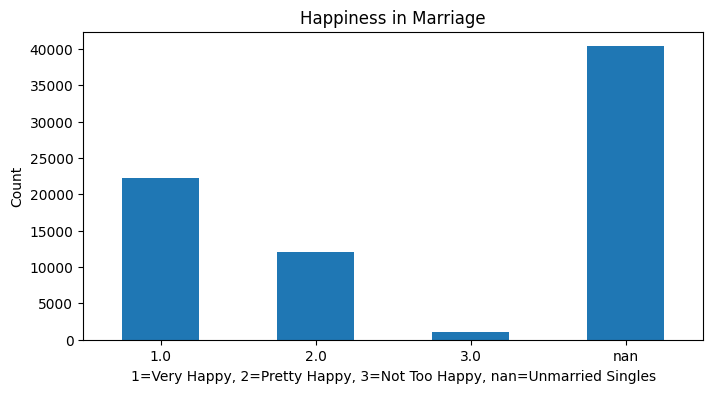

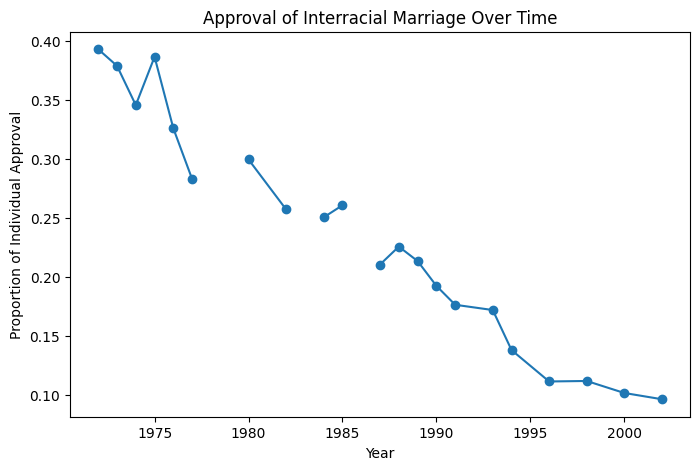

In [37]:
# Histogram of marital happiness
plt.figure(figsize=(8,4))
# Calculate value counts and plot as a bar chart
allthingsmarriage['hapmar'].value_counts(dropna=False).sort_index().plot(kind='bar')
plt.title("Happiness in Marriage")
plt.xlabel("1=Very Happy, 2=Pretty Happy, 3=Not Too Happy, nan=Unmarried Singles")
plt.ylabel("Count")
plt.xticks(rotation=0) # Keep labels horizontal
plt.show()


# Line chart: approval of interracial marriage over time
racmar_by_year = allthingsmarriage.groupby('year')['racmar'].mean()
plt.figure(figsize=(8,5))
plt.plot(racmar_by_year.index, racmar_by_year.values, marker='o')
plt.title("Approval of Interracial Marriage Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion of Individual Approval")
plt.show()

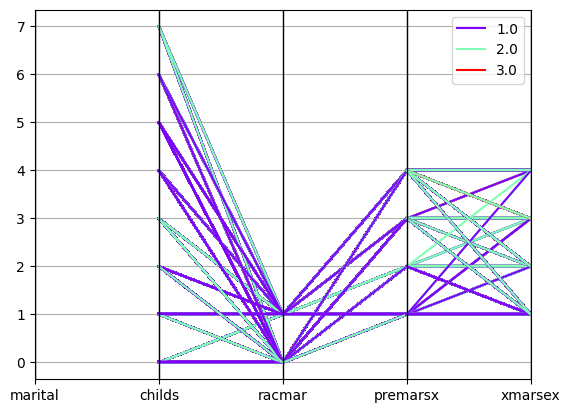

In [38]:
# Select the columns to include in the parallel plot
cols_to_plot = ['marital','childs', 'racmar', 'premarsx', 'xmarsex', 'hapmar']
parallelplot = pd.plotting.parallel_coordinates(allthingsmarriage.dropna(subset=['hapmar'])[cols_to_plot], 'hapmar', colormap='rainbow')

5. Describe your findings. (500 - 1000 words, or more)

Exploring the marriage-related variables from the General Social Survey highlights several important patterns about changing cultural values in the United States, as well as the ways that personal experiences of marriage intersect with social attitudes. One of the first things that stands out is the issue of missing information. Many of these questions are only asked of particular subsets of the population. Some questions are not asked in all survey years, which means that the “.i” or “not available” codes, for example, marital happiness, is only asked of people who are married. This explains the large number of missing values in that column. So as a result what we saw in the raw data are not simply non-answers, but rather reflect a deliberate survey design. Recognizing this limitation is important because the results don't cover everyone in the survey but it does cover those that are eligible to answer.

When we first look at hapmar ( which is martial happiness), a majority of married responders are "very happy" or "pretty happy" in their marriage, and a very small percentage voted for "not too happy". These results are echoed similarly across the years included in the survey, which supports that marriage tends to be a central point of fulfilment and stability in a majority of people's lives. However, the vote of those unhappy in their marriage is just as important because it highlights that experiences are varied and different within a marriage.

Looking at attitudes towards race and marriage ( racemar) most respondents reject the idea that race is/should be a barrier to marriage. A very strong majority voted "no" when they were asked if they would oppose a close relative marrying someone of another race. While there were a persistent amount of individuals that did vote "yes", the vast majority show that the broader demographic has been in agreement for the past few decade about interracial marriages.

When we look at the survey results of sex in relation to marriage, the first survey’s data on premarital sex (premarsx), shows a wide distribution of opinion, while some repondents continue to say that it is "always wrong", many others select "sometimes wrong" or "not wrong at all." Over time, we see a cultural shift as the proportion of those that view it as acceptable has grown. This change reflects a broader societal shift as norms around sex continue to shift, further supporting that the results of this survey is consistent with generational divides in moral attitudes.


The question on extramarital sex (xmarsex) was answered in an overwhelming majority. Most responders said that sex with someone else's own spouse is "always wrong." This shows that even while cultural norms are permissive about premarital sex, extramarital sex is still highly condemend, showing us that in a majority of marriages, fidelity is central to the meaning of marrige itself.


The other variables, like childs (number of children) and martial (martial status) help to contextualize this information. For example, a vast majority of married couples had responded in the lower cluster of (0-3) children while very few reported in the higher count (5+). Because the people that answered the questionnaire were married, a lot of the data is skewed. So our analysis was limited by the scope of the survey questions we chose. This again shows how important it is to interpret the data within the constraints of survey design.


Combining everything together, all of these findings show several broader themes; while marriage continues to shape personal happiness, no matter how small they are, results of being “unhappy” in marriage exist and still account for votes showing that experiences are widely varied within marriages as well.  Second, while norms around sex before marriage have become more permissive, norms around sex outside of marriage remain strikingly conservative. Third, racial attitudes about marriage reflect long-term cultural change toward acceptance, though prejudice has not disappeared entirely. Finally, the patterns of missing data remind us that social science research is always shaped by what the survey question is asking, who is asking them, and what assumptions are built into the survey instrument. In short, the marriage-related variables from the GSS highlight both continuity and change in American culture. Marriage is still widely associated with happiness and stability, but cultural attitudes around race and sexuality reveal ongoing shifts. The GSS data makes it clear that while some norms remain deeply entrenched, others are contested and evolving across generations.
